<a href="https://colab.research.google.com/github/CO-CO-LAB/Exploratory-Data-Analysis/blob/main/Exploratory_Data_Analysis3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Laptops Pricing Dataset

Exploring the effect of different features on the price of laptops

* Visualizing individual feature patterns
* Running descriptive statistical analysis on the dataset
* Useing groups and pivot tables to find the effect of categorical variables on price
* Using Pearson Correlation to measure the interdependence between variables

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [30]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [31]:
df = pd.read_csv(filepath, header=0)

In [32]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


(0.0, 3974.15)

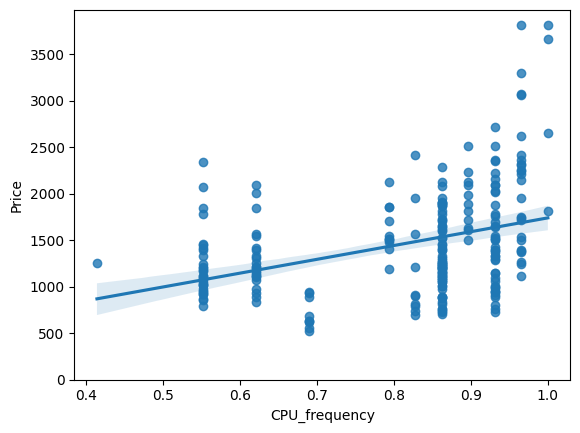

In [33]:
sns.regplot(data=df, x="CPU_frequency", y="Price")
plt.ylim(0,)

(0.0, 3974.15)

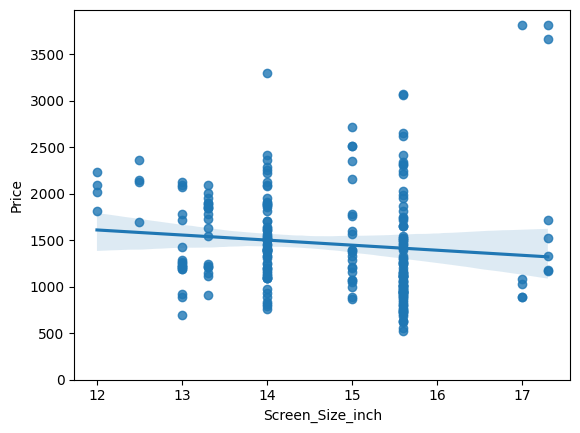

In [34]:
# Screen_Size_inch plot
sns.regplot(data=df, x= "Screen_Size_inch", y= "Price")
plt.ylim(0,)

(0.0, 3974.15)

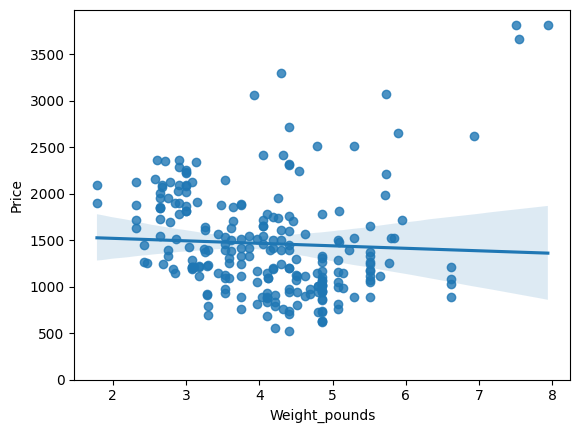

In [35]:
# Weight_pounds plot
sns.regplot(data=df, x="Weight_pounds" , y= "Price")
plt.ylim(0,)

In [36]:
# Correlation values of the three attributes with Price
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


<Axes: xlabel='Category', ylabel='Price'>

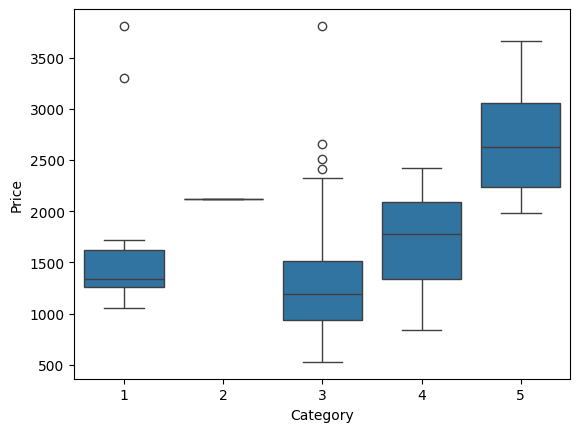

In [37]:
sns.boxplot(data=df, x= "Category" , y= "Price")

<Axes: xlabel='GPU', ylabel='Price'>

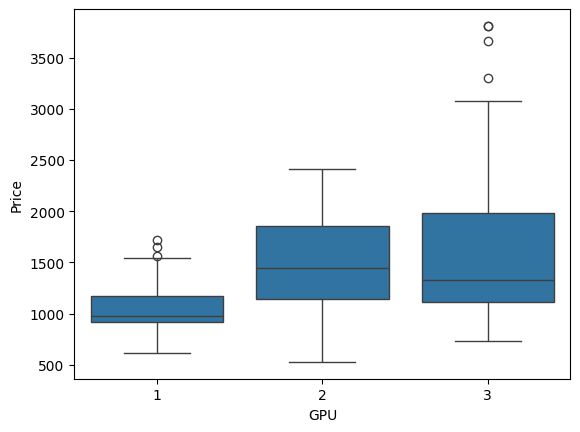

In [38]:
sns.boxplot(data=df, x="GPU" , y= "Price")

<Axes: xlabel='OS', ylabel='Price'>

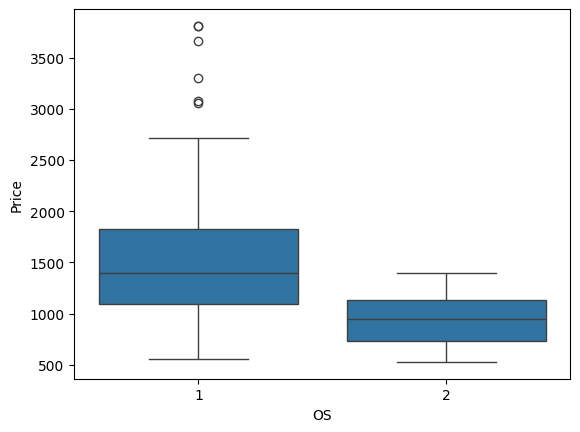

In [39]:
sns.boxplot(data=df, x="OS", y="Price")

<Axes: xlabel='CPU_core', ylabel='Price'>

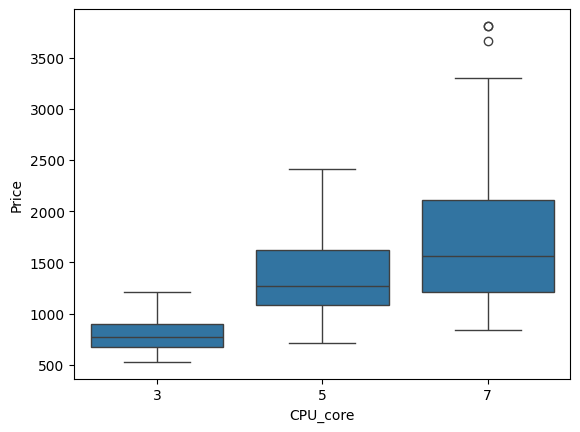

In [40]:
sns.boxplot(x="CPU_core", y="Price", data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

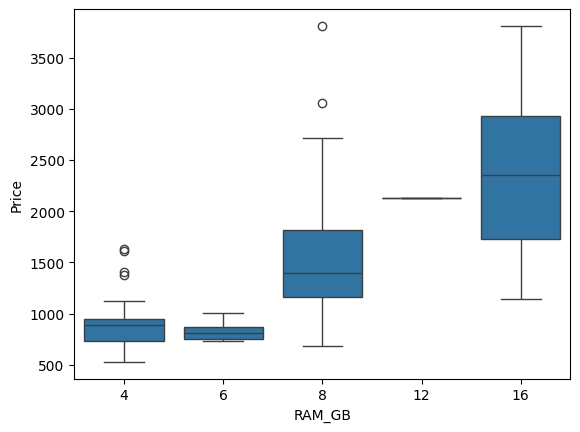

In [41]:
sns.boxplot(x="RAM_GB", y="Price", data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

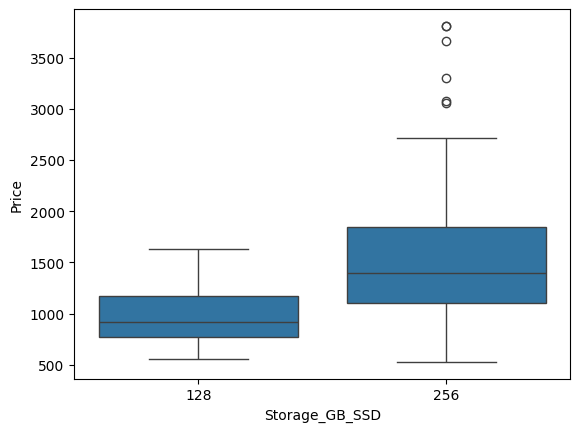

In [42]:
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

In [43]:
df.describe(include= ["object"])

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


In [50]:
df1= df[["GPU", "CPU_core" , "Price"]]
df1= df1.groupby(["GPU", "CPU_core"],as_index=False).agg({"Price" : "mean"})
df1

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [55]:
piv = df1.pivot(index= "GPU", columns= "CPU_core")
print(piv)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


In [60]:
piv = piv.fillna(0) #fill missing values with 0
piv

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

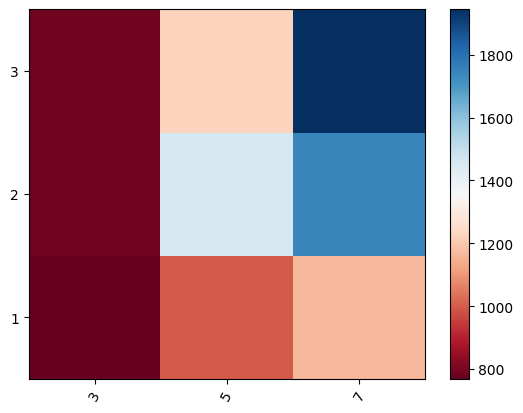

In [63]:
plt.pcolor(piv, cmap = "RdBu")

row_labels = piv.columns.levels[1]
col_labels = piv.index

#move ticks and labels to the center, rotation where the name is too long
plt.xticks(np.arange(piv.shape[1]) + 0.5, row_labels , rotation=60)
plt.yticks(np.arange(piv.shape[0]) + 0.5, col_labels)

plt.colorbar()
plt.show()

## Correlations with diiferent variables

In [ ]:
for parm in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[parm], df["Price"])
    print(parm + " :" + str(pearson_coef) + " " + str(p_value))